In [34]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [35]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [36]:
! nvidia-smi

Sun Mar 27 17:35:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 71%   83C    P2   197W / 260W |   2671MiB / 11019MiB |     21%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 31%   

# Company數量

In [37]:
from pymongo import MongoClient
import pymongo

In [38]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    db_de = db.patent_de
    db_us = db.patent_us
    db_cn = db.patent_cn
except errors.ConnectionFailure as err:
    print(err)

In [39]:
data_assignee = db_de.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])

In [40]:
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [41]:
data_assignee = db_cn.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [42]:
data_assignee = db_us.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_us = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [43]:
final_df = pd.concat([df_family_de,df_family_cn,df_family_us],axis=0)

In [44]:
# 取總數前15家公司
final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
45,Qualcomm Inc,8491
49,Samsung Electronics Co Ltd,6337
28,Intel Corp,3236
61,Telefonaktiebolaget LM Ericsson AB,2488
24,Huawei Technologies Co Ltd,2461
33,LG Electronics Inc,1931
30,International Business Machines Corp,1591
2,Apple Inc,1104
9,Cisco Technology Inc,1092
36,Microsoft Technology Licensing LLC,963


In [45]:
com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

In [46]:
com_df.reset_index(drop=True, inplace=True)

In [47]:
# com_ls = list(final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)["company"])
# com_ls

['Qualcomm Inc',
 'Samsung Electronics Co Ltd',
 'Intel Corp',
 'Telefonaktiebolaget LM Ericsson AB',
 'Huawei Technologies Co Ltd',
 'LG Electronics Inc',
 'International Business Machines Corp',
 'Apple Inc',
 'Cisco Technology Inc',
 'Microsoft Technology Licensing LLC',
 'Micron Technology Inc',
 'Sony Corp',
 'Nokia Technologies Oy',
 'Shenzhen Shenglu IoT Communication Technology Co Ltd',
 'NTT Docomo Inc']

In [5]:
# com_ls=['Qualcomm Inc', 'Samsung Electronics Co Ltd', 'Intel Corp', 'Telefonaktiebolaget LM Ericsson AB', 'Huawei Technologies Co Ltd', 'LG Electronics Inc', 'International Business Machines Corp', 'Apple Inc', 'Cisco Technology Inc', 'Microsoft Technology Licensing LLC', 'Micron Technology Inc', 'Sony Corp', 'Nokia Technologies Oy', 'Shenzhen Shenglu IoT Communication Technology Co Ltd', 'NTT Docomo Inc']

In [24]:
# com_count = [8491,6337,3236,2488,2461,1931,1591,1104,1092,963,731,711,668,656,612]

In [25]:
# com_df = pd.DataFrame((zip(com_ls, com_count)), columns = ['company', 'count'])

In [48]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))

In [49]:
com_df

,company,count,count_log
0,Qualcomm Inc,8491,9.046762
1,Samsung Electronics Co Ltd,6337,8.754161
2,Intel Corp,3236,8.082093
3,Telefonaktiebolaget LM Ericsson AB,2488,7.819234
4,Huawei Technologies Co Ltd,2461,7.808323
5,LG Electronics Inc,1931,7.565793
6,International Business Machines Corp,1591,7.372118
7,Apple Inc,1104,7.006695
8,Cisco Technology Inc,1092,6.995766
9,Microsoft Technology Licensing LLC,963,6.870053


In [50]:
com_ls = list(com_df.company)

In [86]:
ccontry.set_index("company", inplace=True)
ccontry_all = ccontry.loc[com_ls,:].copy()
ccontry_all.loc["all"] = list(ccontry_all.apply(lambda x: sum(x),axis=0))
# ccontry_all

# top15 country
t15_country = list(ccontry_all.T.sort_values("all",ascending=False).head(15).index.values)

,AP,AR,AT,AU,BE,BG,BR,CA,CH,CL,...,SI,SM,TN,TR,TW,UA,US,UY,WO,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.0,14.0,0.0,528.0,0.0,0.0,1328.0,532.0,0.0,57.0,...,12.0,0.0,8.0,0.0,2153.0,0.0,8345.0,0.0,7747.0,17.0
Samsung Electronics Co Ltd,0.0,0.0,0.0,147.0,0.0,0.0,9.0,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,217.0,0.0,6175.0,0.0,3438.0,0.0
Intel Corp,0.0,0.0,0.0,9.0,0.0,0.0,60.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,167.0,0.0,3254.0,0.0,1546.0,0.0
Telefonaktiebolaget LM Ericsson AB,2.0,182.0,0.0,136.0,0.0,0.0,348.0,140.0,0.0,21.0,...,0.0,0.0,0.0,7.0,61.0,0.0,2331.0,0.0,2436.0,139.0
Huawei Technologies Co Ltd,0.0,2.0,0.0,75.0,0.0,0.0,204.0,81.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1341.0,0.0,2117.0,4.0
LG Electronics Inc,0.0,1.0,0.0,31.0,0.0,0.0,25.0,16.0,0.0,12.0,...,0.0,0.0,0.0,0.0,10.0,0.0,1859.0,0.0,1294.0,1.0
International Business Machines Corp,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1687.0,0.0,142.0,2.0
Apple Inc,0.0,0.0,0.0,8.0,0.0,0.0,18.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,62.0,0.0,1045.0,0.0,1013.0,0.0
Cisco Technology Inc,0.0,0.0,0.0,13.0,0.0,0.0,0.0,54.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1160.0,0.0,326.0,0.0


In [89]:
t15_country

['US',
 'WO',
 'CN',
 'EP',
 'KR',
 'JP',
 'TW',
 'BR',
 'DE',
 'SG',
 'AU',
 'CA',
 'RU',
 'ES',
 'MX']

In [58]:
ccpc.set_index("company", inplace=True)
ccpc_all = ccpc.loc[com_ls,:].copy()
ccpc_all.loc["all"] = list(ccpc_all.apply(lambda x: sum(x),axis=0))

In [73]:
# top15 CPC
t15_cpc = list(ccpc_all.T.sort_values("all",ascending=False).head(15).index.values)

# Data

In [53]:
ccontry = pd.read_csv("./final_data/company_country_all.csv")

In [54]:
ccpc = pd.read_csv("./final_data/company_cpc_all.csv")

In [55]:
ccontry[ccontry.company.isin(com_ls)].head()

,company,AP,AR,AT,AU,BE,BG,BR,CA,CH,...,SI,SM,TN,TR,TW,UA,US,UY,WO,ZA
716,Apple Inc,0.0,0.0,0.0,8.0,0.0,0.0,18.0,2.0,0.0,...,0.0,0.0,0.0,0.0,62.0,0.0,1045.0,0.0,1013.0,0.0
2958,Cisco Technology Inc,0.0,0.0,0.0,13.0,0.0,0.0,0.0,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1160.0,0.0,326.0,0.0
6392,Huawei Technologies Co Ltd,0.0,2.0,0.0,75.0,0.0,0.0,204.0,81.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1341.0,0.0,2117.0,4.0
6965,Intel Corp,0.0,0.0,0.0,9.0,0.0,0.0,60.0,4.0,0.0,...,0.0,0.0,0.0,0.0,167.0,0.0,3254.0,0.0,1546.0,0.0
7007,International Business Machines Corp,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1687.0,0.0,142.0,2.0


In [56]:
ccontry = ccontry[ccontry.company.isin(com_ls)]

# Similarity計算

## Country

- 換成機率    

[KL](https://datascience.stackexchange.com/questions/9262/calculating-kl-divergence-in-python)  
[KL neg](https://stats.stackexchange.com/questions/41297/kullback-leibler-divergence-negative-values)

In [96]:
ccontry = ccontry.loc[:,t15_country]

In [93]:
# ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [95]:
ccontry2

,US,WO,CN,EP,KR,JP,TW,BR,DE,SG,AU,CA,RU,ES,MX
company,,,,,,,,,,,,,,,
Apple Inc,0.263956,0.255873,0.222784,0.128063,0.036878,0.016923,0.015661,0.004547,0.048245,0.000505,0.002021,0.000505,0.000758,0.002778,0.000505
Cisco Technology Inc,0.582037,0.163573,0.069242,0.140492,0.002509,0.008530,0.000000,0.000000,0.000000,0.000000,0.006523,0.027095,0.000000,0.000000,0.000000
Huawei Technologies Co Ltd,0.167186,0.263932,0.299215,0.158584,0.023812,0.033537,0.000000,0.025433,0.000125,0.000374,0.009350,0.010098,0.005486,0.002618,0.000249
Intel Corp,0.367186,0.174453,0.170052,0.087226,0.031708,0.024825,0.018845,0.006770,0.112729,0.002370,0.001016,0.000451,0.001354,0.000903,0.000113
International Business Machines Corp,0.761969,0.064137,0.093496,0.003613,0.000903,0.037037,0.000000,0.000903,0.036585,0.000452,0.000452,0.000452,0.000000,0.000000,0.000000
LG Electronics Inc,0.315192,0.219396,0.118176,0.105799,0.153950,0.046796,0.001695,0.004239,0.015938,0.003221,0.005256,0.002713,0.003900,0.000678,0.003052
Micron Technology Inc,0.336977,0.171578,0.286122,0.064639,0.098384,0.016635,0.021863,0.000000,0.002376,0.001426,0.000000,0.000000,0.000000,0.000000,0.000000
Microsoft Technology Licensing LLC,0.348778,0.289310,0.148121,0.160161,0.013134,0.005837,0.002189,0.005108,0.000000,0.004013,0.006202,0.006202,0.004013,0.002919,0.004013
NTT Docomo Inc,0.147289,0.209966,0.207458,0.171106,0.013789,0.168286,0.001880,0.027891,0.000000,0.003447,0.012849,0.020056,0.006268,0.003761,0.005954


In [94]:
P = ccontry2[ccontry2.index==com_ls[0]].values.tolist()[0][1:]
Q = ccontry2[ccontry2.index==com_ls[1]].values.tolist()[0][1:]

In [12]:
# print(P)
# print(Q)

### KL Divergence

In [13]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)
    
    mylist = np.asarray(a) / np.asarray(b)
    mylist = [0 if math.isnan(x) else x for x in mylist]
    mylist = [0 if np.isinf(x) else x for x in mylist]
    mylist = [0 if np.isneginf(x) else x for x in np.log(mylist)]
    mylist = np.sum(a*np.asarray(mylist))

    return mylist

In [14]:
mylist = np.asarray(P) / np.asarray(Q)
mylist = [0 if math.isnan(x) else x for x in mylist]
mylist = [0 if np.isinf(x) else x for x in mylist]
mylist = [0 if np.isneginf(x) else x for x in np.log(mylist)]
mylist = np.sum(P*np.asarray(mylist))
mylist

0.41924802435001735

In [15]:
np.log(mylist)

-0.8692925906333511

In [17]:
# sum(ccontry2.loc["#glowontech",:])

- 計算Qualcomm Inc和其他公司的相似程度

In [18]:
ccontry3 = ccontry2.copy()

In [19]:
ccontry3["KL"] = ccontry3.apply(lambda x: KL(ccontry3.loc["Qualcomm Inc",:],x), axis=1)

In [20]:
ccontry3.sort_values(["KL"],ascending=True)

,AP,AR,AT,AU,BE,BG,BR,CA,CH,CL,...,SM,TN,TR,TW,UA,US,UY,WO,ZA,KL
company,,,,,,,,,,,,,,,,,,,,,
Shenzhen Shenglu IoT Communication Technology Co Ltd,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.296017,0.000000,-0.298151
Qualcomm Inc,0.000000,0.000397,0.0,0.014962,0.0,0.0,0.037632,0.015076,0.0,0.001615,...,0.0,0.000227,0.00000,0.061011,0.0,0.236476,0.0,0.219530,0.000482,0.000000
Huawei Technologies Co Ltd,0.000000,0.000249,0.0,0.009330,0.0,0.0,0.025376,0.010076,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.166812,0.0,0.263341,0.000498,0.092557
Micron Technology Inc,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.00000,0.021863,0.0,0.336977,0.0,0.171578,0.000000,0.108302
Sony Corp,0.000000,0.000000,0.0,0.009037,0.0,0.0,0.007625,0.010449,0.0,0.000000,...,0.0,0.000000,0.00000,0.012426,0.0,0.211240,0.0,0.209545,0.001130,0.152012
Cisco Technology Inc,0.000000,0.000000,0.0,0.006523,0.0,0.0,0.000000,0.027095,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.582037,0.0,0.163573,0.000000,0.159302
Nokia Technologies Oy,0.000000,0.001392,0.0,0.008702,0.0,0.0,0.009050,0.008702,0.0,0.002785,...,0.0,0.000000,0.00000,0.007309,0.0,0.247128,0.0,0.206056,0.001392,0.180592
Telefonaktiebolaget LM Ericsson AB,0.000166,0.015076,0.0,0.011266,0.0,0.0,0.028827,0.011597,0.0,0.001740,...,0.0,0.000000,0.00058,0.005053,0.0,0.193091,0.0,0.201789,0.011514,0.246695
Apple Inc,0.000000,0.000000,0.0,0.001978,0.0,0.0,0.004450,0.000494,0.0,0.000000,...,0.0,0.000000,0.00000,0.015328,0.0,0.258344,0.0,0.250433,0.000000,0.296878


### PCB
- 和Qualcomm Inc比較
- η怎麼調整(?)

In [140]:
ccontry_pcb = ccontry2.loc[com_ls,:].copy()
ccontry_pcb

,US,WO,CN,EP,KR,JP,TW,BR,DE,SG,AU,CA,RU,ES,MX
company,,,,,,,,,,,,,,,
Qualcomm Inc,0.239071,0.221939,0.152782,0.139174,0.046324,0.038045,0.061680,0.038045,0.000057,0.025440,0.015126,0.015241,0.001375,0.004727,0.000974
Samsung Electronics Co Ltd,0.260505,0.145039,0.184821,0.139512,0.220300,0.012951,0.009155,0.000380,0.014048,0.002025,0.006201,0.001434,0.000591,0.002658,0.000380
Intel Corp,0.367186,0.174453,0.170052,0.087226,0.031708,0.024825,0.018845,0.006770,0.112729,0.002370,0.001016,0.000451,0.001354,0.000903,0.000113
Telefonaktiebolaget LM Ericsson AB,0.210455,0.219935,0.148339,0.207837,0.031961,0.052997,0.005507,0.031419,0.001083,0.003160,0.012279,0.012640,0.032322,0.013543,0.016522
Huawei Technologies Co Ltd,0.167186,0.263932,0.299215,0.158584,0.023812,0.033537,0.000000,0.025433,0.000125,0.000374,0.009350,0.010098,0.005486,0.002618,0.000249
LG Electronics Inc,0.315192,0.219396,0.118176,0.105799,0.153950,0.046796,0.001695,0.004239,0.015938,0.003221,0.005256,0.002713,0.003900,0.000678,0.003052
International Business Machines Corp,0.761969,0.064137,0.093496,0.003613,0.000903,0.037037,0.000000,0.000903,0.036585,0.000452,0.000452,0.000452,0.000000,0.000000,0.000000
Apple Inc,0.263956,0.255873,0.222784,0.128063,0.036878,0.016923,0.015661,0.004547,0.048245,0.000505,0.002021,0.000505,0.000758,0.002778,0.000505
Cisco Technology Inc,0.582037,0.163573,0.069242,0.140492,0.002509,0.008530,0.000000,0.000000,0.000000,0.000000,0.006523,0.027095,0.000000,0.000000,0.000000


In [141]:
def PCB(a,b):
    return sum(a*b)

ccontry_pcb["sum"] = ccontry_pcb.apply(lambda x: PCB(ccontry_pcb.loc["Qualcomm Inc",:],x), axis=1)

###### n

In [142]:
pcb_ls=[]
n=0.3

for i in ccontry_pcb.index:
    pcb = ccontry_pcb.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Qualcomm Inc"].values-com_df.count_log[com_df.company==i].values)**2)
    pcb_ls.append(pcb[0])
    
ccontry_pcb["pcb"]=pcb_ls

In [143]:
ccontry_pcb.sort_values(["pcb"],ascending=True)

,US,WO,CN,EP,KR,JP,TW,BR,DE,SG,AU,CA,RU,ES,MX,sum,pcb
company,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.239071,0.221939,0.152782,0.139174,0.046324,0.038045,0.061680,0.038045,0.000057,0.025440,0.015126,0.015241,0.001375,0.004727,0.000974,0.159102,0.159102
Samsung Electronics Co Ltd,0.260505,0.145039,0.184821,0.139512,0.220300,0.012951,0.009155,0.000380,0.014048,0.002025,0.006201,0.001434,0.000591,0.002658,0.000380,0.153581,0.179266
Intel Corp,0.367186,0.174453,0.170052,0.087226,0.031708,0.024825,0.018845,0.006770,0.112729,0.002370,0.001016,0.000451,0.001354,0.000903,0.000113,0.168550,0.447726
Telefonaktiebolaget LM Ericsson AB,0.210455,0.219935,0.148339,0.207837,0.031961,0.052997,0.005507,0.031419,0.001083,0.003160,0.012279,0.012640,0.032322,0.013543,0.016522,0.156330,0.608377
Huawei Technologies Co Ltd,0.167186,0.263932,0.299215,0.158584,0.023812,0.033537,0.000000,0.025433,0.000125,0.000374,0.009350,0.010098,0.005486,0.002618,0.000249,0.170003,0.630122
LG Electronics Inc,0.315192,0.219396,0.118176,0.105799,0.153950,0.046796,0.001695,0.004239,0.015938,0.003221,0.005256,0.002713,0.003900,0.000678,0.003052,0.166218,0.824199
International Business Machines Corp,0.761969,0.064137,0.093496,0.003613,0.000903,0.037037,0.000000,0.000903,0.036585,0.000452,0.000452,0.000452,0.000000,0.000000,0.000000,0.212699,1.054029
Apple Inc,0.263956,0.255873,0.222784,0.128063,0.036878,0.016923,0.015661,0.004547,0.048245,0.000505,0.002021,0.000505,0.000758,0.002778,0.000505,0.175312,1.423874
Cisco Technology Inc,0.582037,0.163573,0.069242,0.140492,0.002509,0.008530,0.000000,0.000000,0.000000,0.000000,0.006523,0.027095,0.000000,0.000000,0.000000,0.206535,1.468510


## CPC

In [144]:
ccpc = ccpc.loc[:,t15_cpc]

In [145]:
# ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [146]:
ccpc_pcb = ccpc2.loc[com_ls,:].copy()
ccpc_pcb

,H04,G06,H01,G01,G11,H03,Y02,G10,A61,B60,G02,G08,H02,G09,G05
company,,,,,,,,,,,,,,,
Qualcomm Inc,0.900009,0.022542,0.027304,0.013548,0.001891,0.017826,0.008394,0.001280,0.000553,0.000438,0.000300,0.003102,0.000980,0.000507,0.001326
Samsung Electronics Co Ltd,0.536416,0.233627,0.064403,0.017411,0.018034,0.016221,0.009761,0.018587,0.018006,0.005001,0.019805,0.005865,0.013969,0.016731,0.006163
Intel Corp,0.483946,0.292356,0.111552,0.016258,0.010442,0.013756,0.014976,0.006097,0.006097,0.005346,0.002063,0.009254,0.012224,0.007785,0.007847
Telefonaktiebolaget LM Ericsson AB,0.926075,0.026820,0.003409,0.014774,0.000114,0.011648,0.012217,0.000000,0.000000,0.000739,0.000170,0.002898,0.000568,0.000000,0.000568
Huawei Technologies Co Ltd,0.905300,0.040351,0.007379,0.006442,0.000000,0.013529,0.014466,0.001113,0.000000,0.002050,0.000234,0.006091,0.000820,0.000351,0.001874
LG Electronics Inc,0.663450,0.132097,0.002495,0.014688,0.000000,0.003578,0.008897,0.040062,0.015676,0.060964,0.021467,0.011345,0.001601,0.003860,0.019819
International Business Machines Corp,0.281524,0.466662,0.083514,0.023198,0.005388,0.002544,0.010552,0.023049,0.030831,0.017586,0.003592,0.022001,0.007932,0.007708,0.013919
Apple Inc,0.933315,0.024406,0.002994,0.016331,0.001270,0.004899,0.012158,0.000000,0.000000,0.000000,0.000907,0.001270,0.001361,0.000363,0.000726
Cisco Technology Inc,0.757336,0.184907,0.004530,0.009678,0.000206,0.001544,0.013899,0.001647,0.001647,0.005971,0.002471,0.004118,0.006692,0.000206,0.005148


In [147]:
def PCB(a,b):
    return sum(a*b)

ccpc_pcb["sum"] = ccpc_pcb.apply(lambda x: PCB(ccpc_pcb.loc["Qualcomm Inc",:],x), axis=1)

###### n

In [148]:
pcb_ls=[]
n=0.5

for i in ccpc_pcb.index:
    pcb = ccpc_pcb.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Qualcomm Inc"].values-com_df.count_log[com_df.company==i].values)**2)
    pcb_ls.append(pcb[0])
    
ccpc_pcb["pcb"]=pcb_ls

In [149]:
ccpc_pcb.sort_values(["pcb"],ascending=True)

,H04,G06,H01,G01,G11,H03,Y02,G10,A61,B60,G02,G08,H02,G09,G05,sum,pcb
company,,,,,,,,,,,,,,,,,
Samsung Electronics Co Ltd,0.536416,0.233627,0.064403,0.017411,0.018034,0.016221,0.009761,0.018587,0.018006,0.005001,0.019805,0.005865,0.013969,0.016731,0.006163,0.490536,0.533343
Qualcomm Inc,0.900009,0.022542,0.027304,0.013548,0.001891,0.017826,0.008394,0.001280,0.000553,0.000438,0.000300,0.003102,0.000980,0.000507,0.001326,0.811860,0.811860
Intel Corp,0.483946,0.292356,0.111552,0.016258,0.010442,0.013756,0.014976,0.006097,0.006097,0.005346,0.002063,0.009254,0.012224,0.007785,0.007847,0.445872,0.911165
Huawei Technologies Co Ltd,0.905300,0.040351,0.007379,0.006442,0.000000,0.013529,0.014466,0.001113,0.000000,0.002050,0.000234,0.006091,0.000820,0.000351,0.001874,0.816364,1.583230
Telefonaktiebolaget LM Ericsson AB,0.926075,0.026820,0.003409,0.014774,0.000114,0.011648,0.012217,0.000000,0.000000,0.000739,0.000170,0.002898,0.000568,0.000000,0.000568,0.834695,1.588107
International Business Machines Corp,0.281524,0.466662,0.083514,0.023198,0.005388,0.002544,0.010552,0.023049,0.030831,0.017586,0.003592,0.022001,0.007932,0.007708,0.013919,0.266786,1.669002
LG Electronics Inc,0.663450,0.132097,0.002495,0.014688,0.000000,0.003578,0.008897,0.040062,0.015676,0.060964,0.021467,0.011345,0.001601,0.003860,0.019819,0.600652,1.697287
Microsoft Technology Licensing LLC,0.356683,0.528348,0.011169,0.022217,0.004492,0.002064,0.006313,0.021124,0.007041,0.000971,0.014568,0.003399,0.008377,0.007527,0.005706,0.333698,2.702728
Cisco Technology Inc,0.757336,0.184907,0.004530,0.009678,0.000206,0.001544,0.013899,0.001647,0.001647,0.005971,0.002471,0.004118,0.006692,0.000206,0.005148,0.686209,2.789501


# Scatter Plot

In [150]:
c_df = pd.DataFrame((zip(list(ccpc_pcb["pcb"]), list(ccontry_pcb["pcb"]))), columns = ['cpc', 'country'])

In [151]:
c_df.set_index(ccpc_pcb.index, inplace=True)
c_df

,cpc,country
company,,
Qualcomm Inc,0.811860,0.159102
Samsung Electronics Co Ltd,0.533343,0.179266
Intel Corp,0.911165,0.447726
Telefonaktiebolaget LM Ericsson AB,1.588107,0.608377
Huawei Technologies Co Ltd,1.583230,0.630122
LG Electronics Inc,1.697287,0.824199
International Business Machines Corp,1.669002,1.054029
Apple Inc,2.921980,1.423874
Cisco Technology Inc,2.789501,1.468510


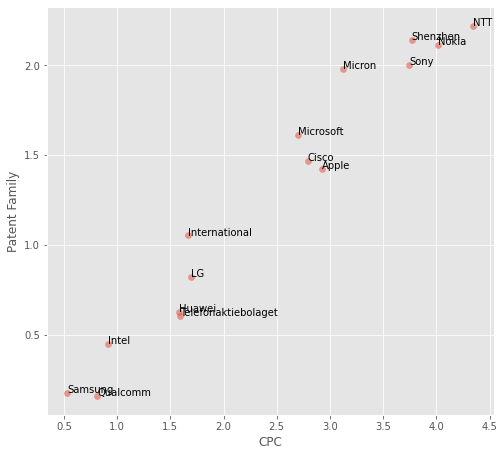

In [152]:
plt.figure(figsize=(8,7.5))
plt.style.use('ggplot')

plt.scatter(c_df.cpc, c_df.country, alpha=0.5)
plt.xlabel("CPC")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(c_df.cpc[i], c_df.country[i],txt.split(" ")[0])
    
plt.show()

# Scatter Plot 2
- IBM

In [176]:
ccontry_pcb_ibm = ccontry2.loc[com_ls,:].copy()
ccontry_pcb_ibm["sum"] = ccontry_pcb_ibm.apply(lambda x: PCB(ccontry_pcb_ibm.loc["International Business Machines Corp",:],x), axis=1)

In [201]:
pcb_ls=[]
n=0.5

for i in ccontry_pcb_ibm.index:
    pcb = ccontry_pcb_ibm.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="International Business Machines Corp"].values-com_df.count_log[com_df.company==i].values)**2)
    pcb_ls.append(pcb[0])
    
ccontry_pcb_ibm["pcb"]=pcb_ls

In [202]:
ccpc_pcb_ibm = ccpc2.loc[com_ls,:].copy()
ccpc_pcb_ibm["sum"] = ccpc_pcb_ibm.apply(lambda x: PCB(ccpc_pcb_ibm.loc["International Business Machines Corp",:],x), axis=1)

In [203]:
pcb_ls=[]
n=0.3

for i in ccpc_pcb_ibm.index:
    pcb = ccpc_pcb_ibm.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="International Business Machines Corp"].values-com_df.count_log[com_df.company==i].values)**2)
    pcb_ls.append(pcb[0])
    
ccpc_pcb_ibm["pcb"]=pcb_ls

In [204]:
c_df = pd.DataFrame((zip(list(ccpc_pcb_ibm["pcb"]), list(ccontry_pcb_ibm["pcb"]))), columns = ['cpc', 'country'])
c_df.set_index(ccpc_pcb_ibm.index, inplace=True)

In [205]:
# c_df

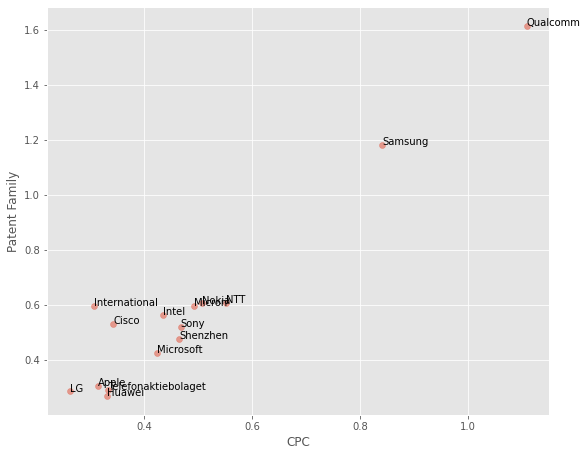

In [206]:
plt.figure(figsize=(9,7.5))
plt.style.use('ggplot')

plt.scatter(c_df.cpc, c_df.country, alpha=0.5)
plt.xlabel("CPC")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(c_df.cpc[i], c_df.country[i],txt.split(" ")[0])
    
plt.show()

# Scatter Plot 3
- 全部

In [67]:
com_df2=com_df.copy()

In [68]:
com_df2.loc[len(com_df2)]=["all",33072,10.40644228192155]

In [69]:
com_df2

,company,count,count_log
0,Qualcomm Inc,8491,9.046762
1,Samsung Electronics Co Ltd,6337,8.754161
2,Intel Corp,3236,8.082093
3,Telefonaktiebolaget LM Ericsson AB,2488,7.819234
4,Huawei Technologies Co Ltd,2461,7.808323
5,LG Electronics Inc,1931,7.565793
6,International Business Machines Corp,1591,7.372118
7,Apple Inc,1104,7.006695
8,Cisco Technology Inc,1092,6.995766
9,Microsoft Technology Licensing LLC,963,6.870053


In [70]:
ccontry_all = ccontry.loc[com_ls,:].copy()
ccontry_all.loc["all"] = list(ccontry_all.apply(lambda x: sum(x),axis=0))
ccontry_all

,AP,AR,AT,AU,BE,BG,BR,CA,CH,CL,...,SI,SM,TN,TR,TW,UA,US,UY,WO,ZA
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.0,14.0,0.0,528.0,0.0,0.0,1328.0,532.0,0.0,57.0,...,12.0,0.0,8.0,0.0,2153.0,0.0,8345.0,0.0,7747.0,17.0
Samsung Electronics Co Ltd,0.0,0.0,0.0,147.0,0.0,0.0,9.0,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,217.0,0.0,6175.0,0.0,3438.0,0.0
Intel Corp,0.0,0.0,0.0,9.0,0.0,0.0,60.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,167.0,0.0,3254.0,0.0,1546.0,0.0
Telefonaktiebolaget LM Ericsson AB,2.0,182.0,0.0,136.0,0.0,0.0,348.0,140.0,0.0,21.0,...,0.0,0.0,0.0,7.0,61.0,0.0,2331.0,0.0,2436.0,139.0
Huawei Technologies Co Ltd,0.0,2.0,0.0,75.0,0.0,0.0,204.0,81.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1341.0,0.0,2117.0,4.0
LG Electronics Inc,0.0,1.0,0.0,31.0,0.0,0.0,25.0,16.0,0.0,12.0,...,0.0,0.0,0.0,0.0,10.0,0.0,1859.0,0.0,1294.0,1.0
International Business Machines Corp,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1687.0,0.0,142.0,2.0
Apple Inc,0.0,0.0,0.0,8.0,0.0,0.0,18.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,62.0,0.0,1045.0,0.0,1013.0,0.0
Cisco Technology Inc,0.0,0.0,0.0,13.0,0.0,0.0,0.0,54.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1160.0,0.0,326.0,0.0


In [71]:
ccontry_pcb_all = ccontry_all.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1
ccontry_pcb_all["sum"] = ccontry_pcb_all.apply(lambda x: PCB(ccontry_pcb_all.loc["all",:],x), axis=1)

In [72]:
pcb_ls=[]

for i in ccontry_pcb_all.index:
    pcb = ccontry_pcb_all.loc[[i],:]["sum"].values+(com_df2.count_log[com_df2.company=="all"].values-com_df2.count_log[com_df2.company==i].values)**2
    pcb_ls.append(pcb[0])
    
ccontry_pcb_all["pcb"]=pcb_ls

In [73]:
ccontry_pcb_all

,AP,AR,AT,AU,BE,BG,BR,CA,CH,CL,...,TN,TR,TW,UA,US,UY,WO,ZA,sum,pcb
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.000000,0.000397,0.0,0.014962,0.0,0.0,0.037632,0.015076,0.0,0.001615,...,0.000227,0.000000,0.061011,0.0,0.236476,0.0,0.219530,0.000482,0.158672,2.007403
Samsung Electronics Co Ltd,0.000000,0.000000,0.0,0.006181,0.0,0.0,0.000378,0.001430,0.0,0.000000,...,0.000000,0.000000,0.009124,0.0,0.259628,0.0,0.144551,0.000000,0.166404,2.896438
Intel Corp,0.000000,0.000000,0.0,0.001009,0.0,0.0,0.006723,0.000448,0.0,0.000000,...,0.000000,0.000000,0.018714,0.0,0.364635,0.0,0.173241,0.000000,0.177056,5.579654
Telefonaktiebolaget LM Ericsson AB,0.000166,0.015076,0.0,0.011266,0.0,0.0,0.028827,0.011597,0.0,0.001740,...,0.000000,0.000580,0.005053,0.0,0.193091,0.0,0.201789,0.011514,0.146153,6.839798
Huawei Technologies Co Ltd,0.000000,0.000249,0.0,0.009330,0.0,0.0,0.025376,0.010076,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.166812,0.0,0.263341,0.000498,0.174032,6.924255
LG Electronics Inc,0.000000,0.000169,0.0,0.005237,0.0,0.0,0.004224,0.002703,0.0,0.002027,...,0.000000,0.000000,0.001689,0.0,0.314073,0.0,0.218618,0.000169,0.175053,8.244340
International Business Machines Corp,0.000000,0.000000,0.0,0.000433,0.0,0.0,0.000867,0.000433,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.730936,0.0,0.061525,0.000867,0.221396,9.428520
Apple Inc,0.000000,0.000000,0.0,0.001978,0.0,0.0,0.004450,0.000494,0.0,0.000000,...,0.000000,0.000000,0.015328,0.0,0.258344,0.0,0.250433,0.000000,0.177627,11.735907
Cisco Technology Inc,0.000000,0.000000,0.0,0.006523,0.0,0.0,0.000000,0.027095,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.582037,0.0,0.163573,0.000000,0.217016,11.849727


In [74]:
ccpc

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G16,G21,H01,H02,H03,H04,H05,Y02,Y04,Y10
company,,,,,,,,,,,,,,,,,,,,,
#glowontech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(c-Dot),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0
01 Bulletin Laboratory Co,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
01 COMMUNIQUE LABORATORY Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
0Chain LLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
incNETWORKS Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
mSignia Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
nChain Holdings Ltd,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,138.0,0.0,0.0,0.0,0.0


In [75]:
# ccpc.set_index("company", inplace=True)
ccpc_all = ccpc.loc[com_ls,:].copy()
ccpc_all.loc["all"] = list(ccpc_all.apply(lambda x: sum(x),axis=0))

In [76]:
ccpc_all2 = ccpc_all.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

# ccpc_pcb_ibm = ccpc2.loc[com_ls,:].copy()
ccpc_all2["sum"] = ccpc_all2.apply(lambda x: PCB(ccpc_all2.loc["all",:],x), axis=1)

In [77]:
ccpc_all2

,A01,A21,A22,A23,A24,A41,A42,A43,A44,A45,...,G21,H01,H02,H03,H04,H05,Y02,Y04,Y10,sum
company,,,,,,,,,,,,,,,,,,,,,
Qualcomm Inc,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000000,...,0.0,0.027181,0.000976,0.017746,0.895970,0.001837,0.008356,0.000287,0.000000,0.609196
Samsung Electronics Co Ltd,0.000000,0.0,0.0,0.000027,0.000000,0.000135,0.000014,0.000122,0.000243,0.000635,...,0.0,0.061415,0.013321,0.015469,0.511531,0.012415,0.009308,0.000405,0.000230,0.384074
Intel Corp,0.000427,0.0,0.0,0.000000,0.000000,0.000152,0.000000,0.000091,0.000000,0.000000,...,0.0,0.108724,0.011915,0.013408,0.471676,0.007283,0.014596,0.001006,0.000061,0.368426
Telefonaktiebolaget LM Ericsson AB,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.003385,0.000564,0.011566,0.919544,0.001016,0.012130,0.000621,0.000000,0.624779
Huawei Technologies Co Ltd,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.007350,0.000817,0.013476,0.901762,0.000992,0.014409,0.000233,0.000000,0.615068
LG Electronics Inc,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000132,0.000044,0.000000,0.000175,...,0.0,0.002325,0.001491,0.003334,0.618222,0.003115,0.008291,0.000307,0.000000,0.438017
International Business Machines Corp,0.001758,0.0,0.0,0.000000,0.000070,0.000070,0.000000,0.000000,0.000000,0.000000,...,0.0,0.078492,0.007455,0.002391,0.264594,0.001829,0.009917,0.002040,0.000141,0.252434
Apple Inc,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.002985,0.001357,0.004884,0.930361,0.000000,0.012119,0.000090,0.000000,0.631630
Cisco Technology Inc,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.004466,0.006597,0.001522,0.746575,0.003451,0.013701,0.004770,0.000101,0.532885


In [78]:
pcb_ls=[]

for i in ccpc_all2.index:
    pcb = ccpc_all2.loc[[i],:]["sum"].values+(com_df2.count_log[com_df2.company=="all"].values-com_df2.count_log[com_df2.company==i].values)**2
    pcb_ls.append(pcb[0])
#     print(ccpc_all.loc[[i],:]["sum"].values)
    
ccpc_all2["pcb"]=pcb_ls

In [79]:
c_df = pd.DataFrame((zip(list(ccpc_all2["pcb"]), list(ccontry_pcb_all["pcb"]))), columns = ['cpc', 'country'])
c_df.set_index(ccpc_all2.index, inplace=True)

In [80]:
c_df

,cpc,country
company,,
Qualcomm Inc,2.457926,2.007403
Samsung Electronics Co Ltd,3.114108,2.896438
Intel Corp,5.771025,5.579654
Telefonaktiebolaget LM Ericsson AB,7.318423,6.839798
Huawei Technologies Co Ltd,7.365291,6.924255
LG Electronics Inc,8.507303,8.244340
International Business Machines Corp,9.459558,9.428520
Apple Inc,12.189910,11.735907
Cisco Technology Inc,12.165597,11.849727


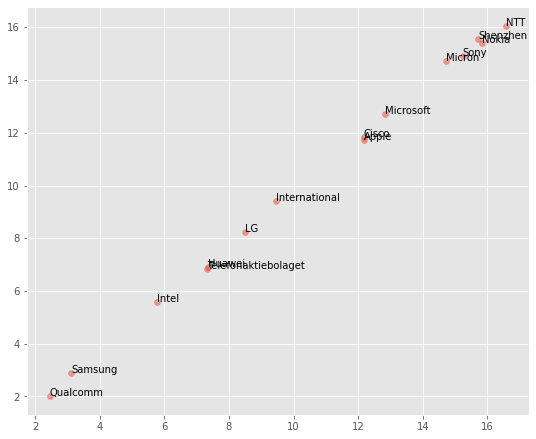

In [81]:
c_df2 = c_df.drop(["all"])

plt.figure(figsize=(9,7.5))
plt.style.use('ggplot')

plt.scatter(c_df2.cpc, c_df2.country, alpha=0.5)

for i, txt in enumerate(c_df2.index):
    plt.text(c_df2.cpc[i], c_df2.country[i],txt.split(" ")[0])
    
plt.show()